In [ ]:
# http://www.woshipm.com/data-analysis/756741.html
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/ykdsg/Documents/数据分析/7周数据分析练习/DataAnalyst.csv',encoding='gb2312')

df

In [ ]:
df.info


In [ ]:
len(df.positionId.unique())

In [ ]:
# drop_duplicates函数通过subset参数选择以哪个列为去重基准。keep参数则是保留方式，first是保留第一个
df_duplicates= df.drop_duplicates(subset='positionId',keep='first')
df_duplicates.head(5)


In [ ]:
def cut_word(word: str,method='bottom'):
    position= word.find('-')
    length = len(word)
    if position != -1:
        bottomSalary=int(word[:position-1])
        topSalary=int(word[position+1:length-1])
    else:
        bottomSalary=int(word[:word.upper().find('K')])
        topSalary=bottomSalary

    if method=='top':
        return topSalary
    else:
        return bottomSalary
# apply将word_cut函数应用在salary列的所有行
df_duplicates['bottomSalary']= df_duplicates.salary.apply(cut_word)
df_duplicates['topSalary']= df_duplicates.salary.apply(cut_word,method='top')

# df_duplicates.topSalary
df_duplicates.bottomSalary=df_duplicates.bottomSalary.astype('int')
df_duplicates.topSalary=df_duplicates.topSalary.astype('int')

In [ ]:
df_duplicates['avgSalary']=df_duplicates.apply(lambda x:(x.bottomSalary+x.topSalary)/2,axis=1)


In [ ]:
df_clean=df_duplicates[['city','companyShortName','companySize','education','positionName','positionLables','workYear','avgSalary']]
df_clean.head

In [ ]:
df_clean.city.value_counts()

In [ ]:
# describe能快速生成各类统计指标
df_clean.describe()

In [ ]:
import matplotlib.pyplot as plt
# plt.style.use(‘ggplot’)使用R语言中的ggplot2配色作为绘图风格，纯粹为了好看。
plt.style.use('ggplot')
# 用hist函数很方便的就绘制除出直方图
df_clean.avgSalary.hist()

In [ ]:
# 为了更细的粒度,将直方图的宽距继续缩小
df_clean.avgSalary.hist(bins=15)



In [ ]:
from matplotlib.font_manager import FontProperties
# 图表默认用英文字体，而这里的都是中文，导致了冲突。所以需要改用matplotlib
font_zh=FontProperties(fname='/Library/Fonts/Microsoft/Microsoft Yahei.ttf')
# 箱型图，城市维度
ax=df_clean.boxplot(column='avgSalary',by='city',figsize=(9,7))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)



In [ ]:
# 箱型图，学历维度
ax=df_clean.boxplot(column='avgSalary',by='education',figsize=(9,7))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)



In [ ]:
# 箱型图，工作年限维度
df_clean.sort_values('workYear')
ax=df_clean.boxplot(column='avgSalary',by='workYear',figsize=(9,7))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

In [ ]:
# 箱型图，分析北京、上海学历维度
df_sh_bj=df_clean[df_clean['city'].isin(['上海','北京'])]

ax=df_sh_bj.boxplot(column='avgSalary',by=['education','city'],figsize=(14,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)


In [ ]:
# 针对不同城市进行了分组,返回的是不同城市的各列计数结果
df_clean.groupby('city').count()


In [ ]:
# 计算出了不同城市的平均薪资。因为mean方法只针对数值，而各列中只有avgSalary是数值，于是返回了这个唯一结果。
df_clean.groupby('city').mean()


In [ ]:
# groupby可以传递一组列表，这时得到一组层次化的Series。按城市和学历分组计算了平均薪资
# 再调用unstack方法，进行行列转置，这样看的就更清楚了
df_clean.groupby(['city','education']).mean().unstack()

In [ ]:
# 在groupby后面加一个avgSalary，说明只统计avgSalary的计数结果，不用混入相同数据
df_clean.groupby(['city','education']).avgSalary.count().unstack()
# 要求博士学历的岗位只有6个，所谓的平均薪资，也只取决于公司开出的价码，波动性很强，毕竟这只是招聘薪资，不代表真实的博士在职薪资


In [ ]:
# agg函数，同时传入count和mean方法，然后返回了不同公司的计数和平均值两个结果
# agg是一个很方便的函数，它能针对分组后的列数据进行丰富多彩的计算
df_clean.groupby('companyShortName').avgSalary.agg(['count','mean']).sort_values(by='count',ascending=False)


In [ ]:
# 计算出不同城市，招聘数据分析师需求前5的公司
def topN(df,n=5):
    counts=df.value_counts()
    return counts.sort_values(ascending=False)[:n]

df_clean.groupby('city').companyShortName.apply(topN)

# agg和apply是不同的，虽然某些方法相近，比如求sum，count等，但是apply支持更细的粒度，它能按组进行复杂运算，将数据拆分合并，而agg则必须固定为列

In [27]:
bins=[0,3,5,10,15,20,30,100]
level=['0-3','3-5','5-10','10-15','15-20','20-30','30+']
df_clean['level']=pd.cut(df_clean['avgSalary'],bins=bins,labels=level)
# cut的作用是分桶，它也是数据分析常用的一种方法，将不同数据划分出不同等级，也就是将数值型数据加工成分类数据，在机器学习的特征工程中应用比较多。cut可以等距划分，传入一个数字就好。这里为了更好的区分，我传入了一组列表进行人工划分，加工成相应的标签

df_clean[['avgSalary','level']]

/Users/ykdsg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,avgSalary,level
0,8.0,5-10
1,12.5,10-15
2,5.0,3-5
3,7.0,5-10
4,2.5,0-3
5,12.5,10-15
6,10.5,10-15
7,6.0,5-10
8,6.0,5-10
9,3.0,0-3


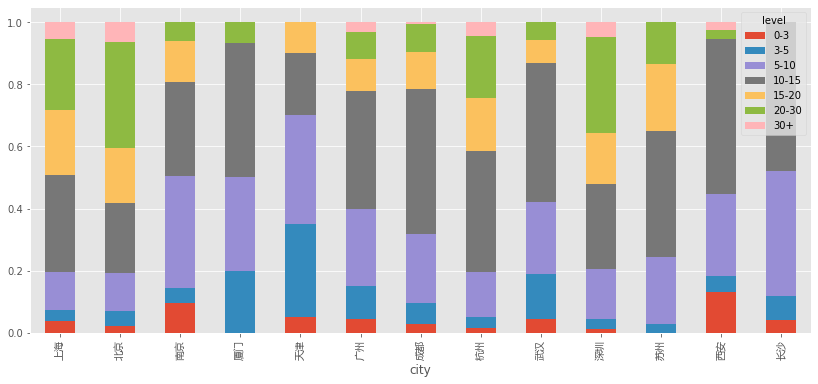

In [28]:
df_level = df_clean.groupby(['city','level']).avgSalary.count().unstack()
df_level_prop=df_level.apply(lambda x:x/x.sum(),axis=1)
ax=df_level_prop.plot.bar(stacked=True,figsize=(14,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

# 用lambda转换百分比，然后作堆积百分比柱形图(matplotlib好像没有直接调用的函数)。这里可以较为清晰的看到不同等级在不同地区的薪资占比。它比箱线图和直方图的好处在于，通过人工划分，具备业务含义。0～3是实习生的价位，3～6是刚毕业没有基础的新人，整理数据那种，6～10是有一定基础的，以此类推